In [1]:
import pandas as pd
from tqdm.notebook import tqdm
from os.path import exists
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from data.get_uci import all_datasets
from analysis.util import fetch, init_uci_dict, get_uci_info

In [2]:
filters = {
    "group": "benchmark"
}
raw = fetch("soft-gp-3", filters)

100%|██████████| 150/150 [00:59<00:00,  2.51it/s]


In [3]:
# filters = {
#     "group": "benchmark6",
# }
# raw2 = fetch("soft-gp-2", filters)

In [4]:
uci_info = get_uci_info()

In [7]:
uci_dict = {}
for exp in raw:
    model = exp.config["model.name"]
    dataset = exp.config["dataset.name"]
    if model == "exact":
        continue
    num_inducing = exp.config["model.num_inducing"]
    dtype = exp.config["model.dtype"]
    seed = exp.config["training.seed"]
    train_frac = float(exp.config["dataset.train_frac"])
    if (dataset, seed, num_inducing, train_frac, model) in uci_dict:
        print("FAIL", (dataset, seed, num_inducing, train_frac, model))
    uci_dict[(dataset, seed, num_inducing, train_frac, model)] = exp.history

# for exp in raw2:
#     model = exp.config["model.name"]
#     if model == "sv-gp" or model == "svi-gp":
#         dataset = exp.config["dataset.name"]
#         num_inducing = exp.config["model.num_inducing"]
#         dtype = exp.config["model.dtype"]
#         seed = exp.config["training.seed"]
#         train_frac = float(exp.config["dataset.train_frac"])
#         if (dataset, seed, num_inducing, train_frac, model) in uci_dict:
#             print("FAIL", (dataset, seed, num_inducing, train_frac, model))
#         uci_dict[(dataset, seed, num_inducing, train_frac, model)] = exp.history

In [8]:
seeds = [6535, 8830, 92357]
num_inducings = [512, 1024]
KZZ = {}
all_bins = {}
fracs = [0.9]
tmp = {
    "N": [int(np.floor(N * 0.9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
}
models = ["soft-gp", "svi-gp", "sv-gp"]

# models = ["sv-gp"]
for seed in seeds:
    for model in models:
        for num_inducing in num_inducings:
            for frac in fracs:
                xs = []
                ts = []
                for dataset, _, _, _ in uci_info:
                    try:
                        xs += [uci_dict[(dataset, seed, num_inducing, frac, model)]["test_rmse"][49]]
                        ts += [np.array(uci_dict[(dataset, seed, num_inducing, frac, model)]["epoch_time"][49]).mean()]
                    except Exception as e:
                        xs += [np.nan]
                        ts += [np.nan]
                        print("Exception", e, model, dataset)

                tmp[f"{model}-{num_inducing}-{frac}-{seed}"] = xs
                tmp[f"time-{model}-{num_inducing}-{frac}-{seed}"] = ts

df = pd.DataFrame(data=tmp)
df.index = [name.capitalize().replace("_", "-") for name, _, _, _ in uci_info]
df

Exception ('pol', 6535, 1024, 0.9, 'soft-gp') soft-gp pol
Exception ('elevators', 6535, 1024, 0.9, 'soft-gp') soft-gp elevators
Exception ('bike', 6535, 1024, 0.9, 'soft-gp') soft-gp bike
Exception ('kin40k', 6535, 1024, 0.9, 'soft-gp') soft-gp kin40k
Exception ('protein', 6535, 1024, 0.9, 'soft-gp') soft-gp protein
Exception ('keggdirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggdirected
Exception ('slice', 6535, 1024, 0.9, 'soft-gp') soft-gp slice
Exception ('keggundirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggundirected
Exception ('3droad', 6535, 1024, 0.9, 'soft-gp') soft-gp 3droad
Exception ('song', 6535, 1024, 0.9, 'soft-gp') soft-gp song
Exception ('buzz', 6535, 1024, 0.9, 'soft-gp') soft-gp buzz
Exception ('houseelectric', 6535, 1024, 0.9, 'soft-gp') soft-gp houseelectric
Exception 'test_rmse' sv-gp 3droad
Exception 'test_rmse' sv-gp song
Exception 'test_rmse' sv-gp buzz
Exception 'test_rmse' sv-gp houseelectric
Exception ('pol', 6535, 1024, 0.9, 'sv-gp') sv-gp pol
Excep

,N,D,soft-gp-512-0.9-6535,time-soft-gp-512-0.9-6535,soft-gp-1024-0.9-6535,time-soft-gp-1024-0.9-6535,svi-gp-512-0.9-6535,time-svi-gp-512-0.9-6535,svi-gp-1024-0.9-6535,time-svi-gp-1024-0.9-6535,...,soft-gp-1024-0.9-92357,time-soft-gp-1024-0.9-92357,svi-gp-512-0.9-92357,time-svi-gp-512-0.9-92357,svi-gp-1024-0.9-92357,time-svi-gp-1024-0.9-92357,sv-gp-512-0.9-92357,time-sv-gp-512-0.9-92357,sv-gp-1024-0.9-92357,time-sv-gp-1024-0.9-92357
Pol,13500,26,0.189323,0.920105,NaN,NaN,0.311350,1.002087,0.293879,1.006320,...,NaN,NaN,0.321629,0.957322,0.302315,0.990506,0.265856,0.012270,NaN,NaN
Elevators,14939,18,0.391446,1.077393,NaN,NaN,0.389804,1.150269,0.388547,1.064729,...,NaN,NaN,0.382160,1.032933,0.380195,1.028626,0.394705,0.012463,NaN,NaN
Bike,15641,17,0.207511,1.079932,NaN,NaN,0.283925,1.137022,0.271723,1.198325,...,NaN,NaN,0.278430,1.131288,0.266603,1.128173,0.282261,0.012554,NaN,NaN
Kin40k,36000,8,0.242929,2.683587,NaN,NaN,0.235442,2.403434,0.197408,2.461170,...,NaN,NaN,0.229365,2.348665,0.192121,2.332222,0.201698,0.013974,NaN,NaN
Protein,41157,9,0.657446,2.710649,NaN,NaN,0.692948,2.679390,0.666535,2.717530,...,NaN,NaN,0.687826,2.633452,0.660814,2.784606,0.663133,0.014480,NaN,NaN
Keggdirected,43944,20,0.078620,2.885053,NaN,NaN,0.086384,2.913113,0.085409,3.035610,...,NaN,NaN,0.094062,2.757214,0.093871,2.815181,0.097684,0.014647,NaN,NaN
Slice,48150,385,0.019602,3.294770,NaN,NaN,0.139462,3.336534,0.128189,3.180317,...,NaN,NaN,0.137793,3.104310,0.125348,3.200585,0.454745,0.017519,NaN,NaN
Keggundirected,57247,27,0.115445,3.705515,NaN,NaN,0.130464,3.786998,0.130285,3.783794,...,NaN,NaN,0.131519,3.652276,0.131155,3.757586,0.129346,0.015585,NaN,NaN
3droad,391386,3,0.607416,24.819072,NaN,NaN,0.531515,25.208995,0.495679,25.517936,...,NaN,NaN,0.528140,24.444096,0.495213,24.332983,NaN,NaN,NaN,NaN
Song,270000,90,0.798511,17.977834,NaN,NaN,0.810078,18.176633,0.808013,17.515554,...,NaN,NaN,0.801442,17.350673,0.799972,17.532561,NaN,NaN,NaN,NaN


# Plot RMSE

In [9]:
def pm_var(df, model):
    print(df[[f'{model}-6535', f'{model}-8830', f'{model}-92357']].mean(axis=1))
    m = df[[f'{model}-6535', f'{model}-8830', f'{model}-92357']].mean(axis=1).round(3).astype(str)
    v = df[[f'{model}-6535', f'{model}-8830', f'{model}-92357']].std(axis=1).round(3).astype(str).apply(lambda x: f" $\pm$ {x}")
    return (m + v).apply(lambda x: x.replace("nan $\pm$ nan", "-"))
df_rmse = pd.DataFrame()
df_rmse[['N', 'D']] = df[['N', 'D']]
for model in ["soft-gp-512", "sv-gp-512", "svi-gp-1024"]:
    for frac in [0.9]:
        df_rmse[f'{model}-{frac}'] = pm_var(df, f'{model}-{frac}')

df_rmse

Pol               0.195711
Elevators         0.389132
Bike              0.204368
Kin40k            0.237249
Protein           0.649576
Keggdirected      0.080813
Slice             0.021749
Keggundirected    0.114813
3droad            0.606718
Song              0.793132
Buzz              0.248491
Houseelectric     0.054663
dtype: float64
Pol               0.260471
Elevators         0.401484
Bike              0.283600
Kin40k            0.205503
Protein           0.660186
Keggdirected      0.090303
Slice             0.478979
Keggundirected    0.124715
3droad                 NaN
Song                   NaN
Buzz                   NaN
Houseelectric          NaN
dtype: float64
Pol               0.299727
Elevators         0.388990
Bike              0.267983
Kin40k            0.191613
Protein           0.659425
Keggdirected      0.087863
Slice             0.126595
Keggundirected    0.126592
3droad            0.495896
Song              0.803247
Buzz              0.295894
Houseelectric     0.07063

,N,D,soft-gp-512-0.9,sv-gp-512-0.9,svi-gp-1024-0.9
Pol,13500,26,0.196 $\pm$ 0.007,0.26 $\pm$ 0.006,0.3 $\pm$ 0.005
Elevators,14939,18,0.389 $\pm$ 0.01,0.401 $\pm$ 0.007,0.389 $\pm$ 0.009
Bike,15641,17,0.204 $\pm$ 0.006,0.284 $\pm$ 0.002,0.268 $\pm$ 0.003
Kin40k,36000,8,0.237 $\pm$ 0.008,0.206 $\pm$ 0.008,0.192 $\pm$ 0.006
Protein,41157,9,0.65 $\pm$ 0.01,0.66 $\pm$ 0.009,0.659 $\pm$ 0.008
Keggdirected,43944,20,0.081 $\pm$ 0.005,0.09 $\pm$ 0.007,0.088 $\pm$ 0.005
Slice,48150,385,0.022 $\pm$ 0.005,0.479 $\pm$ 0.027,0.127 $\pm$ 0.001
Keggundirected,57247,27,0.115 $\pm$ 0.004,0.125 $\pm$ 0.007,0.127 $\pm$ 0.007
3droad,391386,3,0.607 $\pm$ 0.001,-,0.496 $\pm$ 0.001
Song,270000,90,0.793 $\pm$ 0.005,-,0.803 $\pm$ 0.004


In [10]:
df2 = df_rmse[["N", "D", "soft-gp-512-0.9", "sv-gp-512-0.9", "svi-gp-1024-0.9"]]
df2 = df2.sort_values(by=['D'], ascending=[True])
df2

,N,D,soft-gp-512-0.9,sv-gp-512-0.9,svi-gp-1024-0.9
3droad,391386,3,0.607 $\pm$ 0.001,-,0.496 $\pm$ 0.001
Kin40k,36000,8,0.237 $\pm$ 0.008,0.206 $\pm$ 0.008,0.192 $\pm$ 0.006
Protein,41157,9,0.65 $\pm$ 0.01,0.66 $\pm$ 0.009,0.659 $\pm$ 0.008
Houseelectric,1844352,11,0.055 $\pm$ 0.0,-,0.071 $\pm$ 0.0
Bike,15641,17,0.204 $\pm$ 0.006,0.284 $\pm$ 0.002,0.268 $\pm$ 0.003
Elevators,14939,18,0.389 $\pm$ 0.01,0.401 $\pm$ 0.007,0.389 $\pm$ 0.009
Keggdirected,43944,20,0.081 $\pm$ 0.005,0.09 $\pm$ 0.007,0.088 $\pm$ 0.005
Pol,13500,26,0.196 $\pm$ 0.007,0.26 $\pm$ 0.006,0.3 $\pm$ 0.005
Keggundirected,57247,27,0.115 $\pm$ 0.004,0.125 $\pm$ 0.007,0.127 $\pm$ 0.007
Buzz,524925,77,0.248 $\pm$ 0.001,-,0.296 $\pm$ 0.001


In [20]:
latex_table = df2.to_latex(
    index=True,
    escape=False,
    float_format="{:0.3f}".format,
)
print(latex_table)

\begin{tabular}{lrrlll}
\toprule
 & N & D & soft-gp-512-0.9 & sv-gp-512-0.9 & svi-gp-1024-0.9 \\
\midrule
3droad & 391386 & 3 & 0.607 $\pm$ 0.001 & - & 0.496 $\pm$ 0.001 \\
Kin40k & 36000 & 8 & 0.237 $\pm$ 0.008 & 0.206 $\pm$ 0.008 & 0.192 $\pm$ 0.006 \\
Protein & 41157 & 9 & 0.65 $\pm$ 0.01 & 0.66 $\pm$ 0.009 & 0.659 $\pm$ 0.008 \\
Houseelectric & 1844352 & 11 & 0.055 $\pm$ 0.0 & - & 0.071 $\pm$ 0.0 \\
Bike & 15641 & 17 & 0.204 $\pm$ 0.006 & 0.284 $\pm$ 0.002 & 0.268 $\pm$ 0.003 \\
Elevators & 14939 & 18 & 0.389 $\pm$ 0.01 & 0.401 $\pm$ 0.007 & 0.389 $\pm$ 0.009 \\
Keggdirected & 43944 & 20 & 0.081 $\pm$ 0.005 & 0.09 $\pm$ 0.007 & 0.088 $\pm$ 0.005 \\
Pol & 13500 & 26 & 0.196 $\pm$ 0.007 & 0.26 $\pm$ 0.006 & 0.3 $\pm$ 0.005 \\
Keggundirected & 57247 & 27 & 0.115 $\pm$ 0.004 & 0.125 $\pm$ 0.007 & 0.127 $\pm$ 0.007 \\
Buzz & 524925 & 77 & 0.248 $\pm$ 0.001 & - & 0.296 $\pm$ 0.001 \\
Song & 270000 & 90 & 0.793 $\pm$ 0.005 & - & 0.803 $\pm$ 0.004 \\
Slice & 48150 & 385 & 0.022 $\pm$ 0.005

# Plot Time

In [21]:
def pm_var_time(df, model):
    m = df[[f'time-{model}-6535', f'time-{model}-8830', f'time-{model}-92357']].mean(axis=1).round(3).astype(str)
    v = df[[f'time-{model}-6535', f'time-{model}-8830', f'time-{model}-92357']].std(axis=1).round(3).astype(str).apply(lambda x: f" $\pm$ {x}")
    return (m + v).apply(lambda x: x.replace("nan $\pm$ nan", "-"))

tmp = {
    "N": [int(np.floor(N * .9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
    "exact-rep": [e for _, _, _, e in uci_info],
}
df_time = pd.DataFrame()
df_time.index = [name.capitalize().replace("_", "-") for name, _, _, _ in uci_info]
for model in models:
    for num_inducing in num_inducings:
        for frac in fracs:
            col = pm_var_time(df, f'{model}-{num_inducing}-{frac}')
            df_time[f'{model}-{num_inducing}-{frac}'] = col
df_time

,soft-gp-512-0.9,soft-gp-1024-0.9,svi-gp-512-0.9,svi-gp-1024-0.9,sv-gp-512-0.9,sv-gp-1024-0.9
Pol,0.927 $\pm$ 0.031,-,0.991 $\pm$ 0.03,1.021 $\pm$ 0.04,0.011 $\pm$ 0.001,-
Elevators,1.041 $\pm$ 0.052,-,1.089 $\pm$ 0.059,1.069 $\pm$ 0.043,0.012 $\pm$ 0.001,-
Bike,1.099 $\pm$ 0.065,-,1.107 $\pm$ 0.046,1.132 $\pm$ 0.064,0.012 $\pm$ 0.002,-
Kin40k,2.572 $\pm$ 0.097,-,2.344 $\pm$ 0.063,2.384 $\pm$ 0.068,0.014 $\pm$ 0.001,-
Protein,2.644 $\pm$ 0.065,-,2.655 $\pm$ 0.023,2.754 $\pm$ 0.034,0.014 $\pm$ 0.002,-
Keggdirected,2.874 $\pm$ 0.065,-,2.884 $\pm$ 0.115,2.943 $\pm$ 0.114,0.012 $\pm$ 0.002,-
Slice,3.26 $\pm$ 0.038,-,3.267 $\pm$ 0.141,3.203 $\pm$ 0.023,0.017 $\pm$ 0.001,-
Keggundirected,3.671 $\pm$ 0.105,-,3.741 $\pm$ 0.077,3.792 $\pm$ 0.039,0.014 $\pm$ 0.002,-
3droad,24.598 $\pm$ 0.351,-,25.78 $\pm$ 1.696,25.149 $\pm$ 0.708,-,-
Song,17.631 $\pm$ 0.31,-,17.758 $\pm$ 0.413,17.651 $\pm$ 0.22,-,-


In [22]:
tmp = {
    "N": [int(np.floor(N * 0.9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
}
df_44 = pd.DataFrame(data=tmp)
df_44.index = [name.capitalize().replace("_", "-") for name, _, _, _ in uci_info]
df5 = pd.concat([df_44, df_time[["soft-gp-512-0.9", "svi-gp-512-0.9", "svi-gp-1024-0.9"]]], axis=1)
df5 = df5.sort_values(by=['D'], ascending=[True])
df5

,N,D,soft-gp-512-0.9,svi-gp-512-0.9,svi-gp-1024-0.9
3droad,391386,3,24.598 $\pm$ 0.351,25.78 $\pm$ 1.696,25.149 $\pm$ 0.708
Kin40k,36000,8,2.572 $\pm$ 0.097,2.344 $\pm$ 0.063,2.384 $\pm$ 0.068
Protein,41157,9,2.644 $\pm$ 0.065,2.655 $\pm$ 0.023,2.754 $\pm$ 0.034
Houseelectric,1844352,11,125.553 $\pm$ 15.604,118.175 $\pm$ 0.979,118.85 $\pm$ 1.676
Bike,15641,17,1.099 $\pm$ 0.065,1.107 $\pm$ 0.046,1.132 $\pm$ 0.064
Elevators,14939,18,1.041 $\pm$ 0.052,1.089 $\pm$ 0.059,1.069 $\pm$ 0.043
Keggdirected,43944,20,2.874 $\pm$ 0.065,2.884 $\pm$ 0.115,2.943 $\pm$ 0.114
Pol,13500,26,0.927 $\pm$ 0.031,0.991 $\pm$ 0.03,1.021 $\pm$ 0.04
Keggundirected,57247,27,3.671 $\pm$ 0.105,3.741 $\pm$ 0.077,3.792 $\pm$ 0.039
Buzz,524925,77,34.253 $\pm$ 0.617,34.048 $\pm$ 0.749,33.741 $\pm$ 0.837


In [23]:
latex_table = df5.to_latex(
    index=True,
    escape=False,
    float_format="{:0.3f}".format,
)
print(latex_table)

\begin{tabular}{lrrlll}
\toprule
 & N & D & soft-gp-512-0.9 & svi-gp-512-0.9 & svi-gp-1024-0.9 \\
\midrule
3droad & 391386 & 3 & 24.598 $\pm$ 0.351 & 25.78 $\pm$ 1.696 & 25.149 $\pm$ 0.708 \\
Kin40k & 36000 & 8 & 2.572 $\pm$ 0.097 & 2.344 $\pm$ 0.063 & 2.384 $\pm$ 0.068 \\
Protein & 41157 & 9 & 2.644 $\pm$ 0.065 & 2.655 $\pm$ 0.023 & 2.754 $\pm$ 0.034 \\
Houseelectric & 1844352 & 11 & 125.553 $\pm$ 15.604 & 118.175 $\pm$ 0.979 & 118.85 $\pm$ 1.676 \\
Bike & 15641 & 17 & 1.099 $\pm$ 0.065 & 1.107 $\pm$ 0.046 & 1.132 $\pm$ 0.064 \\
Elevators & 14939 & 18 & 1.041 $\pm$ 0.052 & 1.089 $\pm$ 0.059 & 1.069 $\pm$ 0.043 \\
Keggdirected & 43944 & 20 & 2.874 $\pm$ 0.065 & 2.884 $\pm$ 0.115 & 2.943 $\pm$ 0.114 \\
Pol & 13500 & 26 & 0.927 $\pm$ 0.031 & 0.991 $\pm$ 0.03 & 1.021 $\pm$ 0.04 \\
Keggundirected & 57247 & 27 & 3.671 $\pm$ 0.105 & 3.741 $\pm$ 0.077 & 3.792 $\pm$ 0.039 \\
Buzz & 524925 & 77 & 34.253 $\pm$ 0.617 & 34.048 $\pm$ 0.749 & 33.741 $\pm$ 0.837 \\
Song & 270000 & 90 & 17.631 $\pm$ 0

# Plot Bins

In [15]:
seeds = [6535, 8830, 92357]
num_inducings = [512, 1024]
KZZ = {}
all_bins = {}
frac = 0.9
# fracs = [0.44, 0.89]
tmp = {
    "N": [int(np.floor(N * 0.9)) for _, N, _, _ in uci_info],
    "D": [D for _, _, D, _ in uci_info],
}
models = ["soft-gp", "svi-gp", "sv-gp"]

# models = ["sv-gp"]
for seed in seeds:
    for model in models:
        for num_inducing in num_inducings:
            K_zzs = []
            bins1 = []
            bins2 = []
            bins3 = []
            bins4 = []
            bins5 = []
            bins6 = []
            for dataset, _, _, _ in uci_info:
                try:
                    # K_zzs += [uci_dict[(dataset, seed, num_inducing, model)]["K_zz"][i] for i in range(5)]
                    bins1 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_0.0"][49]]
                    bins2 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_1e-20"][49]]
                    bins3 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_1e-10"][49]]
                    bins4 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_1e-05"][49]]
                    bins5 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_0.01"][49]]
                    bins6 += [uci_dict[(dataset, seed, num_inducing, frac, model)]["K_zz_bin_0.5"][49]]
                except Exception as e:
                    bins1 += [np.nan]
                    bins2 += [np.nan]
                    bins3 += [np.nan]
                    bins4 += [np.nan]
                    bins5 += [np.nan]
                    bins6 += [np.nan]
                    print("Exception bins", e, model, dataset)

            all_bins[f"0.0-{model}-{num_inducing}-{seed}"] = bins1
            all_bins[f"1e-20-{model}-{num_inducing}-{seed}"] = bins2
            all_bins[f"1e-10-{model}-{num_inducing}-{seed}"] = bins3
            all_bins[f"1e-05-{model}-{num_inducing}-{seed}"] = bins4
            all_bins[f"0.01-{model}-{num_inducing}-{seed}"] = bins5
            all_bins[f"0.5-{model}-{num_inducing}-{seed}"] = bins6
            KZZ[f"kzz-{model}-{num_inducing}-{seed}"] = K_zzs


Exception bins ('pol', 6535, 1024, 0.9, 'soft-gp') soft-gp pol
Exception bins ('elevators', 6535, 1024, 0.9, 'soft-gp') soft-gp elevators
Exception bins ('bike', 6535, 1024, 0.9, 'soft-gp') soft-gp bike
Exception bins ('kin40k', 6535, 1024, 0.9, 'soft-gp') soft-gp kin40k
Exception bins ('protein', 6535, 1024, 0.9, 'soft-gp') soft-gp protein
Exception bins ('keggdirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggdirected
Exception bins ('slice', 6535, 1024, 0.9, 'soft-gp') soft-gp slice
Exception bins ('keggundirected', 6535, 1024, 0.9, 'soft-gp') soft-gp keggundirected
Exception bins ('3droad', 6535, 1024, 0.9, 'soft-gp') soft-gp 3droad
Exception bins ('song', 6535, 1024, 0.9, 'soft-gp') soft-gp song
Exception bins ('buzz', 6535, 1024, 0.9, 'soft-gp') soft-gp buzz
Exception bins ('houseelectric', 6535, 1024, 0.9, 'soft-gp') soft-gp houseelectric
Exception bins 'K_zz_bin_0.0' sv-gp 3droad
Exception bins 'K_zz_bin_0.0' sv-gp song
Exception bins 'K_zz_bin_0.0' sv-gp buzz
Exception bins 'K

In [16]:
df_bins = pd.DataFrame(data=all_bins)
df_bins.index = [name.replace("_", "-") for name, _, _, _ in uci_info]
df_bins

,0.0-soft-gp-512-6535,1e-20-soft-gp-512-6535,1e-10-soft-gp-512-6535,1e-05-soft-gp-512-6535,0.01-soft-gp-512-6535,0.5-soft-gp-512-6535,0.0-soft-gp-1024-6535,1e-20-soft-gp-1024-6535,1e-10-soft-gp-1024-6535,1e-05-soft-gp-1024-6535,...,1e-10-sv-gp-512-92357,1e-05-sv-gp-512-92357,0.01-sv-gp-512-92357,0.5-sv-gp-512-92357,0.0-sv-gp-1024-92357,1e-20-sv-gp-1024-92357,1e-10-sv-gp-1024-92357,1e-05-sv-gp-1024-92357,0.01-sv-gp-1024-92357,0.5-sv-gp-1024-92357
pol,254922,5060,1232,120,62,516,NaN,NaN,NaN,NaN,...,74112.0,25760.0,10930.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
elevators,8180,22498,73014,33468,32018,1468,NaN,NaN,NaN,NaN,...,5596.0,5932.0,160398.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
bike,0,0,2162,12536,85884,17710,NaN,NaN,NaN,NaN,...,0.0,22.0,192532.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
kin40k,314,15184,60242,28538,45848,9072,NaN,NaN,NaN,NaN,...,0.0,36.0,187748.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
protein,156726,49520,31862,6376,3186,1854,NaN,NaN,NaN,NaN,...,59736.0,19128.0,38254.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
keggdirected,63972,60058,60406,15898,15270,4202,NaN,NaN,NaN,NaN,...,27326.0,12892.0,114278.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
slice,261632,0,0,0,0,512,NaN,NaN,NaN,NaN,...,118162.0,55144.0,2624.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
keggundirected,259440,1040,238,42,8,1346,NaN,NaN,NaN,NaN,...,27018.0,16716.0,77958.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3droad,256914,1722,434,80,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song,259050,2484,80,4,0,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


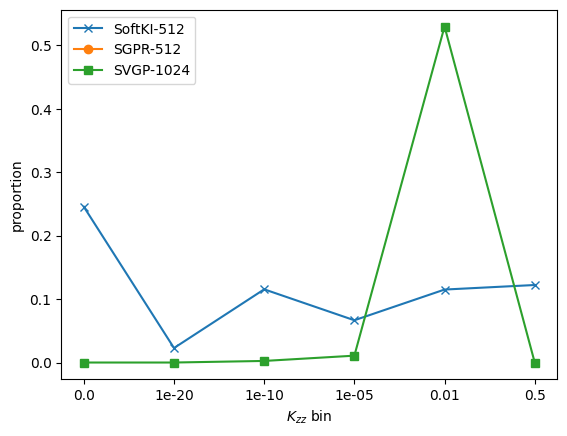

In [17]:
def plot_bins(dataset):
    bins = ["0.0", "1e-20", "1e-10", "1e-05", "0.01", "0.5"]
    plt.plot([df_bins[f"{x}-soft-gp-512-6535"][dataset]/(512**2) for x in bins], label="SoftKI-512", marker="x")
    plt.plot([df_bins[f"{x}-sv-gp-512-6535"][dataset]/(512**2) for x in bins], label="SGPR-512", marker="o")
    plt.plot([df_bins[f"{x}-svi-gp-1024-6535"][dataset]/(1024**2) for x in bins], label="SVGP-1024", marker="s")
    plt.xticks(range(len(bins)), labels=bins)
    plt.xlabel(r"$K_{zz}$ bin")
    plt.ylabel("proportion")
    plt.legend()
    plt.savefig(f"compare/{dataset}.png", bbox_inches="tight")

plot_bins("houseelectric")

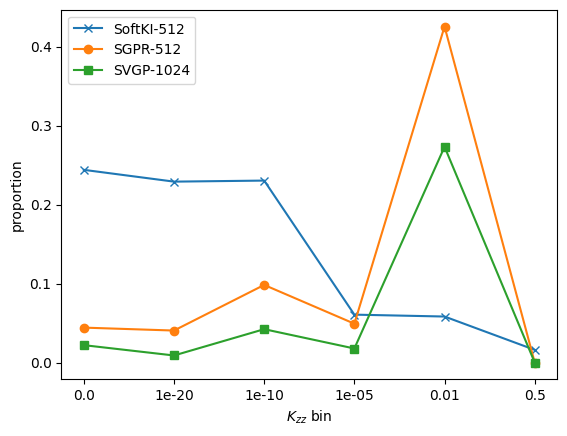

In [18]:
plot_bins("keggdirected")

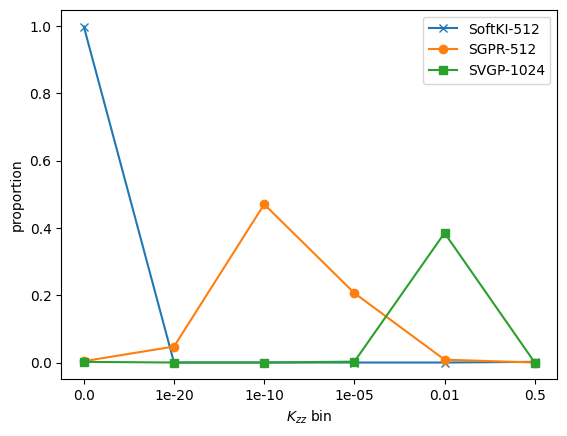

In [19]:
plot_bins("slice")